# Data Structures and Algorithms



In [131]:
from typing import List
from typing import Optional
import numpy as np
import pandas as pd
import statsmodels.api as sm

## GlassDoor

### Draw from distribution

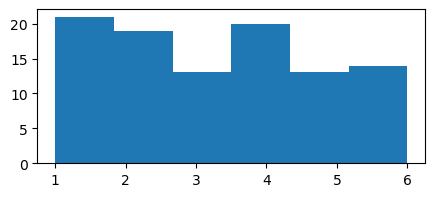

In [ ]:
import random
import matplotlib.pyplot as plt

rng = random.Random(44)

list_array = []
for _ in range(1,101):
    list_array.append( np.floor(rng.uniform(1,7)) )

fig, ax = plt.subplots(figsize=(5,2))
ax.hist(list_array, bins=6);



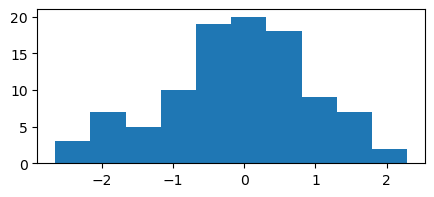

In [ ]:
np.random.seed(2)

list_array = []
for _ in range(0,100):
    list_array.append(np.random.normal(0,1))

fig, ax = plt.subplots(1,1,figsize=(5,2))
ax.hist(list_array);


### Split a string

In [ ]:
string = 'The quick brown fox jumps over the lazy dog'

word = []
sentence = []

for i in range(0,len(string)):
    letter = string[i] # space reached
    if letter == ' ':
        sentence.append(''.join(word))
        word = []
    if i == len(string)-1: # last letter of string
        word.append(letter)
        sentence.append(''.join(word))
    else:
        word.append(letter)

print(sentence)


['The', ' quick', ' brown', ' fox', ' jumps', ' over', ' the', ' lazy', ' dog']


### Square root

In [13]:
def square_root(number):
    if number < 0:
        return "Negative"
    
    x_old = number

    while True:
        x_new = 0.5 * (x_old + number/x_old)
        if abs(x_old - x_new) < 1e-4:
            break
        x_old = x_new

    return x_new


In [14]:
square_root(8)

2.8284271250498643

### Combinations that sum to x

In [25]:
def sum_to_x(integers, target):
    pairs = []
    for i in range(0, len(integers)):
        a = integers[i]

        for j in range(i+1, len(integers)):
            b = integers[j]

            if a+b == target:
                pairs.append((a,b))

    return pairs

In [40]:
def sum_to_x_2pointers(integers,target):
    integers_sorted = sorted(integers)
    pairs = []
    i = 0
    j = len(integers_sorted)-1

    while i < j:
        curr_sum = integers_sorted[i] + integers_sorted[j]

        if curr_sum == target:
            pairs.append((integers_sorted[i],integers_sorted[j]))
            i += 1
            j -= 1
        elif curr_sum < target:
            i += 1
        elif curr_sum > target:
            j -= 1

    return pairs

In [37]:
integers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 8

In [27]:
sum_to_x(integers, target)

[(0, 8), (1, 7), (2, 6), (3, 5)]

In [41]:
sum_to_x_2pointers(integers, target)

[(0, 8), (1, 7), (2, 6), (3, 5)]

### Bootstrapping

In [127]:
person_id = np.linspace(1,1000,1000).reshape(-1,1)
education = np.random.normal(5, 50, 1000).reshape(-1,1)
error = np.random.normal(0, 50, 1000).reshape(-1,1)
income = education + error
df = pd.DataFrame(np.concatenate([person_id, income, education], axis=1), columns=['person_id','income','education'])

In [139]:
X = sm.add_constant(df[['education']])
y = df[['income']]
results = sm.OLS(y, X).fit()
print(results.summary())
# results.params.education

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     1071.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          3.73e-160
Time:                        13:45:00   Log-Likelihood:                -5294.7
No. Observations:                1000   AIC:                         1.059e+04
Df Residuals:                     998   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7343      1.529     -0.480      0.6

In [141]:
params = []
df_bootstrap = df.iloc[[ int(np.random.uniform(0,999)) ]]
for _ in range(0, 5000): # bootstrap sample count
    new_row = df.iloc[[ int(np.random.uniform(0,999)) ]]
    df_bootstrap = pd.concat([df_bootstrap, new_row])

    X = sm.add_constant(df_bootstrap[['education']])
    y = df_bootstrap[['income']]
    results = sm.OLS(y, X).fit()
    params.append(results.params.education)
    


In [143]:
# 1000 too small, 500 is close 0.37 vs actual 0.31
np.std(params)

np.float64(0.037864265701535435)

## Two Pointers

### Ex 1

Given a string s, return true if it is a palindrome, false otherwise.

In [42]:
def check_palindrom(s):
    left = 0
    right = len(s) - 1

    while left < right:
        if s[left] != s[right]:
            return False
        
        left += 1
        right -= 1

    return True

In [45]:
s = 'abcdcba'
s = 'racecar'
s = 'blah'

check_palindrom(s)

False

### Ex 2

Given a sorted array of unique integers and a target integer, return true if there exists a pair of numbers that sum to target, false otherwise. This problem is similar to Two Sum. (In Two Sum, the input is not sorted).

For example, given nums = [1, 2, 4, 6, 8, 9, 14, 15] and target = 13, return true because 4 + 9 = 13.

In [48]:
def sum_to_target(nums, target):
    left = 0
    right = len(nums) -1

    while left < right:
        curr_sum = nums[left] + nums[right]
        if curr_sum == target:
            return True
        elif curr_sum < target:
            left += 1
        elif curr_sum > target:
            right -= 1

    return False

In [49]:
nums = [1, 2, 4, 6, 8, 9, 14, 15]
target = 13

sum_to_target(nums, target)

True

### Ex 3

Given two sorted integer arrays arr1 and arr2, return a new array that combines both of them and is also sorted.

In [53]:
def combine_sort(arr1, arr2):
    ans = []
    p1 = p2 = 0

    while p1 < len(arr1) and p2 < len(arr2):
        if arr1[p1] < arr2[p2]:
            ans.append(arr1[p1])
            p1 += 1
        elif arr1[p1] > arr2[p2]:
            ans.append(arr2[p2])
            p2 += 1
        elif arr1[p1] == arr2[p2]:
            ans.append(arr1[p1])
            ans.append(arr2[p2])
            p1 += 1
            p2 += 1

    # When above loop finishes, at least one string has run out
    # Finish any remainder of strings if unequal length
    while p1 < len(arr1):
        ans.append(arr1[p1])
        p1 += 1

    while p2 < len(arr2):
        ans.append(arr2[p2])
        p2 += 1

    return ans

In [54]:
arr1 = [1, 4, 7, 20]
arr2 = [3, 5, 6]

combine_sort(arr1, arr2)

[1, 3, 4, 5, 6, 7, 20]

### Ex 4 - 392. Is Subsequence [E]

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a new string that is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (i.e., "ace" is a subsequence of "abcde" while "aec" is not).



In [70]:
# Beats 27.40%
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        i = j = 0

        while i < len(s) and j < len(t):
            if s[i] == t[j]:
                i += 1
                j += 1
            else:
                j += 1

        if i == len(s):
            return True
        else:
            return False
        


In [72]:
s = 'abc'
t = 'ahbgdc'
t = 'ahbgd'
sol = Solution()
sol.isSubsequence(s,t)

False

### 344. Reverse String [E]

Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.

In [83]:
# Beats 100.00%
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        left = 0
        right = len(s) - 1

        while left < right:
            char_left = s[left]
            s[left] = s[right]
            s[right] = char_left
            left += 1
            right -= 1
    
        print(s)


In [84]:
s = list('hello')
sol = Solution()
sol.reverseString(s)

['o', 'l', 'l', 'e', 'h']


### 977. Squares of a Sorted Array [E]

Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

In [100]:
# Beats 11.55%
class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:
        nums2 = []
        min_val = 10e5

        for i in range(len(nums)):
            val = nums[i]**2
            nums2.append(val)
            if val < min_val:
                min_index = i
                min_val = val

        right = min_index
        left = right - 1

        nums2sort = []
        while left >= 0 and right < len(nums):
            if nums2[left] < nums2[right]:
                nums2sort.append(nums2[left])
                left -= 1
            elif nums2[left] > nums2[right]:
                nums2sort.append(nums2[right])
                right += 1
            else:
                nums2sort.append(nums2[left])
                nums2sort.append(nums2[right])
                left -= 1
                right += 1

        while left >= 0:
            nums2sort.append(nums2[left])
            left -= 1

        while right < len(nums):
            nums2sort.append(nums2[right])
            right += 1

        return nums2sort


In [102]:
nums = [-4,-1,0,3,10]
nums = [-7,-3,2,3,11]
sol = Solution()
sol.sortedSquares(nums)

[4, 9, 9, 49, 121]

## Sliding Window

### Ex 1

Given an array of positive integers nums and an integer k, find the length of the longest subarray whose sum is less than or equal to k. This is the problem we have been talking about above. We will now formally solve it.

In [105]:
def longest_subarray(nums, k):
    curr = 0
    left = 0
    max_length = 0
    for right in range(0, len(nums)):
        curr += nums[right]

        while curr > k:
            curr -= nums[left]
            left += 1

        max_length = max(max_length, right - left + 1)

    return max_length

In [106]:
nums = [3, 1, 2, 7, 4, 2, 1, 1, 5]
k = 8
longest_subarray(nums, k)


4

### Ex 2

You are given a binary string s (a string containing only "0" and "1"). You may choose up to one "0" and flip it to a "1". What is the length of the longest substring achievable that contains only "1"?

For example, given s = "1101100111", the answer is 5. If you perform the flip at index 2, the string becomes 1111100111.

In [111]:
# i.e. what is the longest string with only 1 '0'
def longest_ones(s):
    max_length = zero_cnt = left = 0
    for right in range(0,len(s)):
        if s[right] == '0':
            zero_cnt += 1

        while zero_cnt > 1:
            if s[left] == '0':
                zero_cnt -= 1

            left += 1

        max_length = max(max_length, right - left + 1)

    return max_length

In [112]:
s = '1101100111'
longest_ones(s)

5

### Ex 3 - 713. Subarray Product Less Than K [M]

Given an array of positive integers nums and an integer k, return the number of subarrays where the product of all the elements in the subarray is strictly less than k.

For example, given the input nums = [10, 5, 2, 6], k = 100, the answer is 8. The subarrays with products less than k are:

[10], [5], [2], [6], [10, 5], [5, 2], [2, 6], [5, 2, 6]


In [145]:
class Solution:
    def numSubarrayProductLessThanK(self, nums: List[int], k: int) -> int:
        if k <= 1:
            return 0
        
        left = 0
        prod = 1
        count = 0

        for right in range(0,len(nums)):
            prod *= nums[right]

            while prod >= k:
                prod //= nums[left]
                left += 1

            count += right - left + 1 # ** if length is 3, then three subarrays end on [right]: length 1, length 2, and length 3

        return count


In [146]:
nums = [10, 5, 2, 6]
k = 100
sol = Solution()
sol.numSubarrayProductLessThanK(nums, k)

8

### Ex 4

Given an integer array nums and an integer k, find the sum of the subarray with the largest sum whose length is k.

In [150]:
def largest_sum(nums, k):
    curr = 0
    max_sum = 0

    # Build first window
    for right in range(0,k):
        curr += nums[right]

    max_sum = curr

    # Update window
    left = 0
    for right in range(k, len(nums)):
        curr += nums[right]
        curr -= nums[left]
        left += 1

        max_sum = max(max_sum, curr)

    return max_sum


In [151]:
def largest_sum(nums, k):
    curr = 0
    max_sum = 0

    # Build first window
    for right in range(0,k):
        curr += nums[right]

    max_sum = curr

    # Update window
    left = 0
    for right in range(k, len(nums)):
        curr += nums[right] - nums[right - k]
        left += 1

        max_sum = max(max_sum, curr)

    return max_sum

In [152]:
nums = [3, -1, 4, 12, -8, 5, 6]
k = 4
largest_sum(nums, k)

18

### 643. Maximum Average Subarray I [E]

You are given an integer array nums consisting of n elements, and an integer k.

Find a contiguous subarray whose length is equal to k that has the maximum average value and return this value. Any answer with a calculation error less than 10-5 will be accepted.

In [166]:
# Beats 50.87 %
class Solution:
    def findMaxAverage(self, nums: List[int], k: int) -> float:
        if k < 1:
            return 0
        
        curr_sum = 0
        # Build initial window
        for right in range(0,k):
            curr_sum += nums[right]

        max_avg = curr_sum/k

        for right in range(k, len(nums)):
            curr_sum += nums[right] - nums[right-k]

            max_avg = max(max_avg, curr_sum/k)

        return max_avg


In [169]:
nums = [1,12,-5,-6,50,3]
k = 4
nums = [5]
k = 1
sol = Solution()
sol.findMaxAverage(nums, k)

5.0

### 1004. Max Consecutive Ones III [M]

Given a binary array nums and an integer k, return the maximum number of consecutive 1's in the array if you can flip at most k 0's.


In [182]:
# Beats 61.52%
class Solution:
    def longestOnes(self, nums: List[int], k: int) -> int:
        if k < 1:
            return 0
        
        zero_cnt = 0
        left = 0
        max_length = 0

        for right in range(0,len(nums)):
            if nums[right] == 0:
                zero_cnt += 1

            while zero_cnt > k:
                if nums[left] == 0:
                    zero_cnt -= 1
                left += 1

            max_length = max(max_length, right - left + 1)
                    
        return max_length
    


In [181]:
nums = [1,1,1,0,0,0,1,1,1,1,0]
k = 2
nums = [0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1]
k = 3
sol = Solution()
sol.longestOnes(nums, k)

10

## Prefix Sum

### Ex 1

Given an integer array nums, an array queries where queries[i] = [x, y] and an integer limit, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from x to y is less than limit, or false otherwise.

* For example, given nums = [1, 6, 3, 2, 7, 2], queries = [[0, 3], [2, 5], [2, 4]], and limit = 13, the answer is [true, false, true]. For each query, the subarray sums are [12, 14, 12].

In [211]:
def queries_answer(nums, queries, limit):
    ans = []
    prefix = [0] * len(nums)
    prefix[0] = nums[0]
    for i in range(1,len(nums)):
        prefix[i] = prefix[i-1] + nums[i]

    for x, y in queries:
        ans.append(prefix[y] - prefix[x] + nums[x] < limit)

    return ans



In [212]:
nums = [1, 6, 3, 2, 7, 2]
queries = [[0, 3], [2, 5], [2, 4]]
limit = 13
queries_answer(nums, queries, limit)

[True, False, True]

### Ex 2 - 2270. Number of Ways to Split Array [M]

You are given a 0-indexed integer array nums of length n.

nums contains a valid split at index i if the following are true:

The sum of the first i + 1 elements is greater than or equal to the sum of the last n - i - 1 elements.
There is at least one element to the right of i. That is, 0 <= i < n - 1.
Return the number of valid splits in nums.

In [213]:
# Beats 14.81%
class Solution:
    def waysToSplitArray(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0

        prefix = [0] * len(nums)
        prefix[0] = nums[0]
        for i in range(1,len(nums)):
            prefix[i] = prefix[i-1] + nums[i]

        count = 0

        for i in range(0,len(nums)-1):
            left_sum = prefix[i]
            right_sum = prefix[len(nums)-1] - left_sum
            if left_sum >= right_sum:
                count +=1

        return count
    

In [215]:
nums = [10,4,-8,7]
nums = [2,3,1,0]
sol = Solution()
sol.waysToSplitArray(nums)

2

### 1480. Running Sum of 1d Array [E]

Given an array nums. We define a running sum of an array as runningSum[i] = sum(nums[0]…nums[i]).

Return the running sum of nums.

In [239]:
class Solution:
    def runningSum(self, nums: List[int]) -> List[int]:
        prefix = [0] * len(nums)
        prefix[0] = nums[0]
        for i in range(1,len(nums)):
            prefix[i] = prefix[i-1] + nums[i]

        return prefix

In [240]:
nums = [1,2,3,4]
nums = [-100]
sol = Solution()
sol.runningSum(nums)

[-100]

### 1413. Minimum Value to Get Positive Step by Step Sum [E]

Given an array of integers nums, you start with an initial positive value startValue. (startValue >= 1)

In each iteration, you calculate the step by step sum of startValue plus elements in nums (from left to right).

Return the minimum positive value of startValue such that the step by step sum is never less than 1.

In [254]:
# Beats 100%
class Solution:
    def minStartValue(self, nums: List[int]) -> int:
        prefix = [0] * len(nums)
        prefix[0] = nums[0]
        for i in range(1,len(nums)):
            prefix[i] = prefix[i-1] + nums[i]
        
        minValue = min(prefix)

        if minValue < 1:
            startValue = 1 - minValue
        else:
            startValue = 1

        return startValue

In [255]:
nums = [-3,2,-3,4,2]
nums = [1,2]
nums = [1,-2,-3]
nums = [-100]
nums = [2,3,5,-5,-1]
sol = Solution()
sol.minStartValue(nums)

1

### 2090. K Radius Subarray Averages [M]

You are given a 0-indexed array nums of n integers, and an integer k.

The k-radius average for a subarray of nums centered at some index i with the radius k is the average of all elements in nums between the indices i - k and i + k (inclusive). If there are less than k elements before or after the index i, then the k-radius average is -1.

Build and return an array avgs of length n where avgs[i] is the k-radius average for the subarray centered at index i.

The average of x elements is the sum of the x elements divided by x, using integer division. The integer division truncates toward zero, which means losing its fractional part.

* For example, the average of four elements 2, 3, 1, and 5 is (2 + 3 + 1 + 5) / 4 = 11 / 4 = 2.75, which truncates to 2.

In [271]:
# Beats 48.59%
class Solution:
    def getAverages(self, nums: List[int], k: int) -> List[int]:
        win_size = 2*k + 1
        avgs = [-1] * len(nums)
        prefix = [0] * len(nums)
        for i in range(0,len(nums)):
            prefix[i] = prefix[i-1] + nums[i]

        for i in range(k,len(nums)-k):
        # sum from i-k to i+k
            avgs[i] = (prefix[i+k] - prefix[i-k] + nums[i-k])//win_size

        return avgs


In [273]:
nums = [7,4,3,9,1,8,5,2,6]
k = 3
nums = [100000]
k = 0
nums = [8]
k = 100000
sol = Solution()
sol.getAverages(nums, k)

[-1]

## Bonus: Two Pointers

### 557. Reverse Words in a String III [E]

Given a string s, reverse the order of characters in each word within a sentence while still preserving whitespace and initial word order.

In [314]:
# Beats 5.05%
# With lists
class Solution:
    def reverseWords(self, s: str) -> str:
        word = []
        sentence = []
        for i in range(0,len(s)):
            if s[i] == ' ' or i == len(s)-1: # if we hit a space or last char
                if i == len(s)-1: # if end of entire string, append last letter to current word
                    word.append(s[i])
                # reverse word
                for j in range(len(word)-1, -1, -1):
                    sentence.append(word[j])
                # add space if space is delimiter
                if s[i] == ' ':
                    sentence.append(' ')
                # reset word
                word = []
            else:
                word.append(s[i])

        return ''.join(sentence)

In [319]:
# Beats 5.05%
# Two pointers
class Solution:
    def reverseWords(self, s: str) -> str:
        sentence = []
        for i in range(0,len(s)):
            if s[i] == ' ':
                j = i-1
                while s[j] != ' ' and j != -1:
                    sentence.append(s[j])
                    j -= 1

                sentence.append(' ')
            
            elif i == len(s)-1:
                j = i
                while s[j] != ' ' and j != -1:
                    sentence.append(s[j])
                    j -=1

        return ''.join(sentence)



In [320]:
s = "Let's take LeetCode contest"
s = "hehhhhhhe"
sol = Solution()
sol.reverseWords(s)

'ehhhhhheh'

### 917. Reverse Only Letters [E]

Given a string s, reverse the string according to the following rules:

* All the characters that are not English letters remain in the same position.

* All the English letters (lowercase or uppercase) should be reversed.

Return s after reversing it.

In [334]:
# Beats 100%
class Solution:
    def reverseOnlyLetters(self, s: str) -> str:
        s_list = list(s)
        left = 0
        right = len(s)-1

        while left < right:

            while s_list[left].isalpha() == False and left < right:
                left += 1

            while s_list[right].isalpha() == False and left < right:
                right -= 1

            s_list[left], s_list[right] = s_list[right], s_list[left]

            left += 1
            right -= 1
                                                            
        return ''.join(s_list)
            

In [336]:
s = "ab-cd"
s = "a-bC-dEf-ghIj"
s = "Test1ng-Leet=code-Q!"
s = "h"
sol = Solution()
sol.reverseOnlyLetters(s)


'h'

### 2540. Minimum Common Value [E]

Given two integer arrays nums1 and nums2, sorted in non-decreasing order, return the minimum integer common to both arrays. If there is no common integer amongst nums1 and nums2, return -1.

Note that an integer is said to be common to nums1 and nums2 if both arrays have at least one occurrence of that integer.

In [413]:
# Beats 11.58% 
class Solution:
    def getCommon(self, nums1: List[int], nums2: List[int]) -> int:
        i = j = 0
        min_com = float('inf')
        while i < len(nums1) and j < len(nums2):
            if nums1[i] == nums2[j]:
                min_com = min(min_com, nums1[i])
                i += 1
                j += 1
            elif nums1[i] > nums2[j]:
                j += 1
            elif nums1[i] < nums2[j]:
                i += 1
            
        return -1 if min_com == float('inf') else min_com

In [414]:
nums1 = [1,2,3]
nums2 = [2,4]
nums1 = [1,2,3,6]
nums2 = [2,3,4,5]
sol = Solution()
sol.getCommon(nums1,nums2)

2

### 283. Move Zeroes [E]

Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

Note that you must do this in-place without making a copy of the array.

In [165]:
# By copying
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        nums2 = [0] * len(nums)
        i = 0

        for left in range(0,len(nums)):
            if nums[left] != 0:
               nums2[i] = nums[left]
               i += 1

        for j in range(0,len(nums)):
            nums[j] = nums2[j]

        

In [184]:
# Modifying in place

# 0 0 0 1   1 0 0 0
# L     R   R     L

# 1 1 1 1
# L
# R

# Beats 5%
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        for left in range(0,len(nums)):
            # Move right to next non-zero
            right = left
            while nums[right] == 0:
                right += 1
                if right == len(nums):
                    break
            
            # If left is 0, swap with right
            if nums[left] == 0 and right < len(nums):
                nums[left], nums[right] = nums[right], nums[left]



In [187]:
nums = [0,1,0,3,12]
nums = [0]
nums = [1,0,1]
sol = Solution()
sol.moveZeroes(nums)

In [188]:
nums

[1, 1, 0]

### 2000. Reverse Prefix of Word [E]

Given a 0-indexed string word and a character ch, reverse the segment of word that starts at index 0 and ends at the index of the first occurrence of ch (inclusive). If the character ch does not exist in word, do nothing.

For example, if word = "abcdefd" and ch = "d", then you should reverse the segment that starts at 0 and ends at 3 (inclusive). The resulting string will be "dcbaefd".
Return the resulting string.

In [221]:
# Beats 100%
class Solution:
    def reversePrefix(self, word: str, ch: str) -> str:
        rev_string = []

        for i in range(len(word)):
            if word[i] == ch:
                for j in range(i,-1,-1):
                    rev_string.append(word[j])

                ans = ''.join(rev_string) + word[i+1:len(word)]
                return ans
                
        return word
    

In [222]:
word = "abcdefd"
ch = "d"
word = "xyxzxe"
ch = "z"
# word = "abcd"
# ch = "z"
sol = Solution()
sol.reversePrefix(word, ch)

'zxyxxe'

## Bonus: Sliding Window

### 209. Minimum Size Subarray Sum [M]

Given an array of positive integers nums and a positive integer target, return the minimal length of a 
subarray whose sum is greater than or equal to target. If there is no such subarray, return 0 instead.



In [388]:
# Beats 12.73
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:

        prefix = [0] * len(nums)
        prefix[0] = nums[0]
        for i in range(1, len(nums)):
            prefix[i] = prefix[i-1] + nums[i]
        
        left = 0
        min_length = len(nums)
        sol_found = 0
        for right in range(0, len(nums)):
            curr = prefix[right] - prefix[left] + nums[left]

            while curr >= target and left < right:
                sol_found = 1
                min_length = min(min_length, right - left + 1)
                left += 1
                curr = prefix[right] - prefix[left] + nums[left]

            if curr >= target: # in case missed last one because left == right
                sol_found = 1
                min_length = min(min_length, right - left + 1)

        if sol_found == 0:
            return 0

        return min_length
            
                



In [389]:
# target = 7
# nums = [2,3,1,2,4,3]
# target = 4
# nums = [1,4,4]
target = 11
nums = [1,1,1,1,1,1,1,1]
sol = Solution()
sol.minSubArrayLen(target, nums)

0

### 1456. Maximum Number of Vowels in a Substring of Given Length [M]

Given a string s and an integer k, return the maximum number of vowel letters in any substring of s with length k.

Vowel letters in English are 'a', 'e', 'i', 'o', and 'u'.

In [191]:
# k = 3
# _ _ _ _ _
# L   R

# Beats 71.24%
class Solution:
    def maxVowels(self, s: str, k: int) -> int:
        vset = 'aeiou'
        vcount = 0
        for right in range(0,k): # first set of k
            if s[right] in vset:
                vcount += 1

        vmax = vcount

        left = 0
        for right in range(k, len(s)):
            if s[right] in vset: # add right vowel
                vcount += 1

            if s[left] in vset: # remove left vowel
                vcount -= 1

            left += 1
            vmax = max(vmax, vcount)

        return vmax


In [194]:
s = "abciiidef"
k = 3
s = "aeiou"
k = 2
s = "leetcode"
k = 3
sol = Solution()
sol.maxVowels(s, k)

2

## Bonus: Prefix Sum

### 1732. Find the Highest Altitude [E]

There is a biker going on a road trip. The road trip consists of n + 1 points at different altitudes. The biker starts his trip on point 0 with altitude equal 0.

You are given an integer array gain of length n where gain[i] is the net gain in altitude between points i​​​​​​ and i + 1 for all (0 <= i < n). Return the highest altitude of a point.


In [398]:
# Beats 100%
class Solution:
    def largestAltitude(self, gain: List[int]) -> int:
        gain = [0] + gain
        prefix = [0] * len(gain)
        prefix[0] = gain[0]
        for i in range(1,len(gain)):
            prefix[i] = prefix[i-1] + gain[i]

        return max(prefix)
        

In [401]:
# n:     0   1   2   3   4   5
# gain: -5   1   5   0   7
gain = [-5,1,5,0,-7]
gain = [-4,-3,-2,-1,4,3,2]
sol = Solution()
sol.largestAltitude(gain)

0

### 724. Find Pivot Index [E]

Given an array of integers nums, calculate the pivot index of this array.

The pivot index is the index where the sum of all the numbers strictly to the left of the index is equal to the sum of all the numbers strictly to the index's right.

If the index is on the left edge of the array, then the left sum is 0 because there are no elements to the left. This also applies to the right edge of the array.

Return the leftmost pivot index. If no such index exists, return -1.

In [205]:
# Beats 129.72%
class Solution:
    def pivotIndex(self, nums: List[int]) -> int:
        prefix = [0] * len(nums)
        prefix[0] = nums[0]
        for i in range(1,len(nums)):
            prefix[i] = prefix[i-1] + nums[i]

        pivot_index = []

        for j in range(0,len(nums)):
            if j == 0:
                left_sum = 0
            else:
                left_sum = prefix[j-1]

            if j == len(nums)-1:
                right_sum = 0
            else:
                right_sum = prefix[len(nums)-1] - prefix[j]

            if left_sum == right_sum:
                pivot_index.append(j)

        if len(pivot_index) > 0:
            return min(pivot_index)
        else:
            return -1

            

In [206]:
nums = [1,7,3,6,5,6]
nums = [1,2,3]
nums = [2,1,-1]
nums = [0]
sol = Solution()
sol.pivotIndex(nums)

0